# UNIT12 지하철 시간대별 데이터 시각화하기

* 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?
* 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은 어디일까?

대중교통 데이터를 바탕으로 질문에 답해보자.

In [2]:
import matplotlib
import matplotlib.font_manager as fm 
fm._rebuild()

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('NanumGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicBold.ttf'),
 ('NanumSquare',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareR.ttf'),
 ('NanumMyeongjo',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumMyeongjo.ttf'),
 ('NanumSquareRound',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundR.ttf'),
 ('NanumBarunGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumBarunGothicBold.ttf'),
 ('NanumGothic',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf'),
 ('NanumSquareRound',
  '/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRoundB.ttf

## 지하철 시간대별 이용 현황 데이터 정제하기
---


In [4]:
import csv
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)

for row in data :
    print(row)

['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '']
['', '', '', '', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차', '승차', '하차']
['2019-01', '1호선', '150', '서울역', '927', '22', '10682', '8774', '1

실행 결과를 살펴보니 헤더(header) 데이터가 2개의 행으로 이루어진 것을 알 수 있다. 첫 번째 행에는 `사용월`, `호선명`, `역 ID`, `역 이름` 그리고 `AM 4:00부터 다음 날 AM 3:00까지의 시간`이 1시간 단위로 구분되어 있다. 두 번째 행에서는 `공백('')` 네 개와 `승차`와 `하차`가 번갈아 나온다. 이 두 줄의 데이터는 분석에 직접적인 영향을 주지 않으므로 `next()` 함수로 제외시키겠다. 그리고 이후 이어지는 각 행의 4번 인덱스부터 마지막까지의 데이터는 `map()` 함수를 사용해서 한꺼번에 정수형으로 바꿔보자.

In [8]:
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)

next(data)
next(data)

for row in data :
    row[4:] = map(int, row[4:])
    print(row)

['2019-01', '1호선', '150', '서울역', 927, 22, 10682, 8774, 13504, 45545, 39110, 103863, 80492, 236747, 61108, 163026, 68446, 86198, 89100, 80051, 98021, 85869, 101282, 91792, 86627, 86386, 113919, 87211, 118223, 91594, 161216, 98032, 249973, 105075, 142575, 77807, 97729, 55056, 96955, 46680, 70982, 35481, 33149, 19442, 3612, 7167, 0, 410, 0, 0, 0, 0]
['2019-01', '1호선', '151', '시청', 74, 0, 2409, 4049, 3532, 19241, 7703, 66876, 9978, 209349, 12818, 88793, 16470, 49343, 22512, 45645, 26040, 41405, 34728, 46800, 40497, 40429, 51586, 34787, 54591, 29029, 80258, 28534, 170225, 28331, 76142, 15634, 57394, 9141, 58745, 8204, 38156, 6345, 14478, 4079, 981, 1256, 3, 29, 0, 0, 0, 0]
['2019-01', '1호선', '152', '종각', 100, 8, 4409, 5105, 4593, 26969, 6733, 104259, 11028, 300081, 14563, 167611, 20165, 80474, 34617, 76633, 42088, 71920, 59893, 75678, 68149, 62408, 84211, 57607, 96197, 55889, 144446, 63459, 257735, 83206, 134259, 51603, 113555, 19039, 135586, 12188, 111743, 8286, 54264, 5560, 4886, 1722, 0,

`map()` 함수의 괄호 안에는 2개의 입력 값이 콤마로 구분되어 있다. 첫 번째 인자에는 `int()` 함수를, 두 번째 인자에는 CSV 파일에서 불러온 데이터가 저장된 `row` 리스트의 4번 인덱스부터 끝까지를 의미하는 값을 지정하였다. 이 경우 `row` 리스트의 4번 인덱스부터 맨 끝 인덱스까지 저장된 값이 모두 `정수형(int)`으로 바뀌어서 저장된다.

따라서 코드 실행 결과를 살펴보면, 각 행의 0~3번 인덱스 값은 문자열로, 4번부터 맨 끝 인덱스 값은 정수로 바뀐 것을 확인할 수 있다.

## 2. 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까
---
아침 7시 승차 데이터의 위치를 확인하니 10번 인덱스에 저장되었있음을 확인할 수 있다.

In [9]:
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)

next(data)
next(data)
result = []

for row in data :
    row[4:] = map(int, row[4:])
    result.append(row[10])
print(len(result))
print(result)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

이 결과를 막대그래프로 표현해보자.

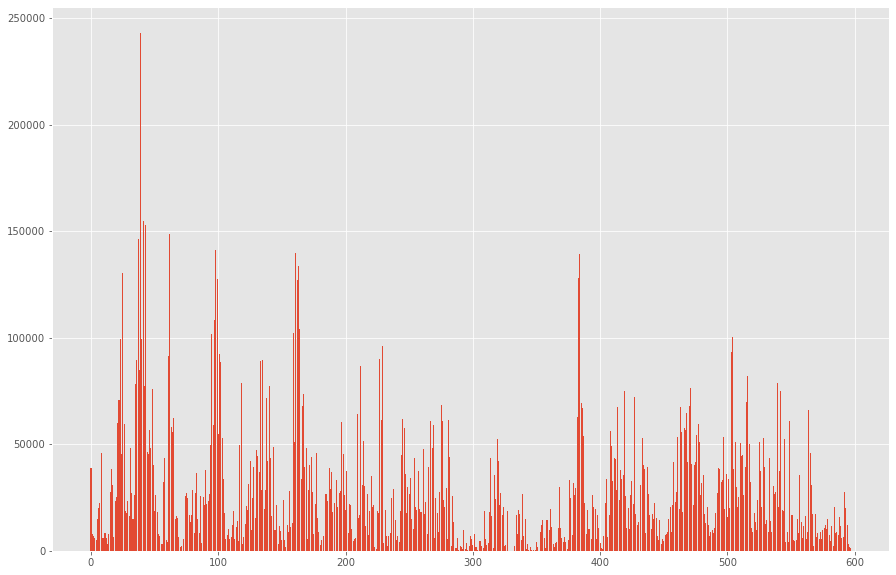

In [12]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.bar(range(len(result)), result)
plt.show()

편차가 매우 크다. 데이터를 오름차순으로 정렬해보자.

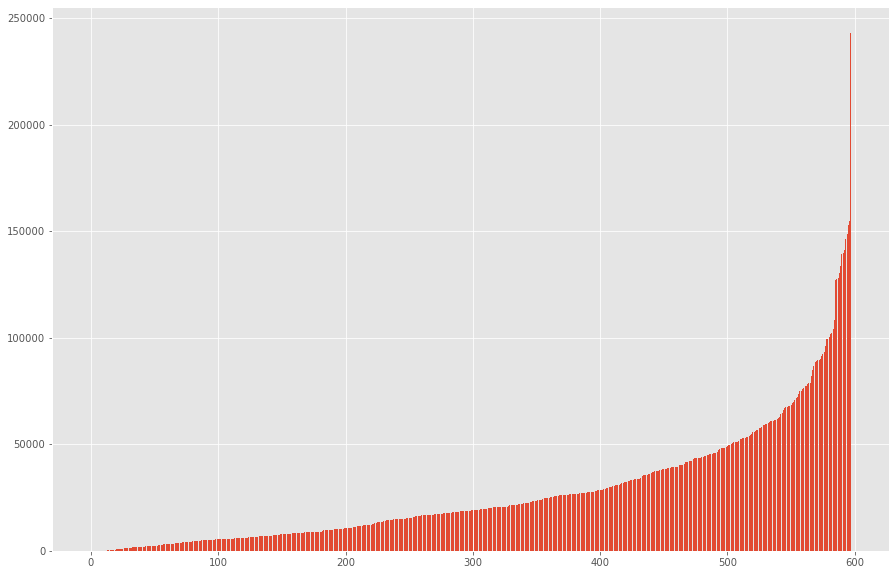

In [14]:
result.sort() # 오름차순으로 변경
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.bar(range(len(result)), result)
plt.show()

한개의 역이 다른 역들과는 큰 차이를 두고 많다는 것을 알 수 있다. 

그러면 출근 시간대라고 할 수 있는 7-9시까지 승차 인원을 합치면 어떻게 될까?

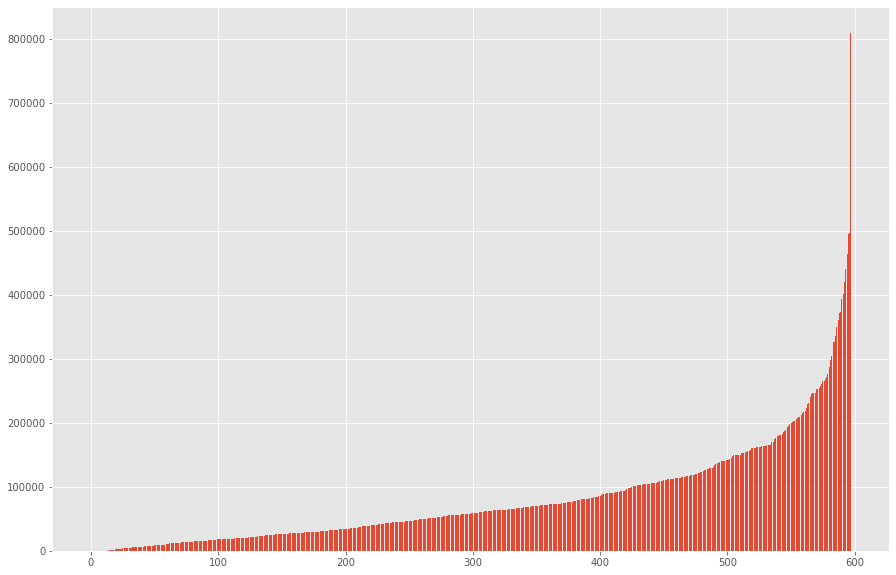

In [15]:
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)

next(data)
next(data)
result = []

for row in data :
    row[4:] = map(int, row[4:])
    result.append(sum(row[10:15:2]))

result.sort()
plt.style.use('ggplot')
plt.figure(figsize=(15, 10))
plt.bar(range(len(result)), result)
plt.show()

시간대를 늘렸지만 그래프의 형태는 거의 비슷하다. 3시간 동안 80만명이 들어오는 역은 어딜까?

승차 인원의 최댓값을 저장할 변수 `mx`와 역의 정보를 저장할 변수 `mx_station`을 초기화하고, 7시부터 9시까지의 승차 인원 합계의 최댓값을 찾아서 출력하자.

In [19]:
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)

next(data)
next(data)

mx = 0 # 최댓값을 저장할 변수 초기화
mx_station = '' # 최댓값을 갖는 역 이름 저장 변수 초기화

for row in data : # 최댓값 찾기(전부 탐색하여 최댓값을 갱신하는 방식)
    row[4:] = map(int, row[4:])
    if sum(row[10:15:2]) > mx :
        mx = sum(row[10:15:2])
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx)

신림(2호선) 809541


그러면 출근 시간대에 사람들이 가장 많이 내리는 역은 어디일까?

In [21]:
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)
next(data)
next(data)

mx = 0 # 최댓값을 저장할 변수 초기화
mx_station = '' # 최댓값을 갖는 역 이름 저장 변수 초기화

for row in data : # 최댓값 찾기(전부 탐색하여 최댓값을 갱신하는 방식)
    row[4:] = map(int, row[4:])
    a = row[11:16:2] # 하차 인원 값 추출하기
    if sum(a) > mx :
        mx = sum(a)
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx)

강남(2호선) 984427


## 3. 밤 11시에 사람들이 가장 많이 타는 역은 어디일까
---
밤 11시의 데이터는 몇 번 인덱스에 있을까? 

데이터를 다시 관찰하니 승차 시각이 1시간씩 늦어질 때마다 승차 인원에 해당하는 인덱스는 2씩 늘어난다. 그리고 승차를 시작하는 시각의 인덱스 값은 4이다. 즉, 0시가 아니라 4시부터 승차가 시작된다는 점을 고려해야 한다.

이러한 단서를 바탕으로 승차 시각(`t`)과 승차 인원이 적힌 인덱스(`i`) 값의 관계를 분석하니 `i = 4 + (t – 4) * 2`라는 패턴을 찾을 수 있다.

In [24]:
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)
next(data)
next(data)

mx = 0 # 최댓값을 저장할 변수 초기화
mx_station = '' # 최댓값을 갖는 역 이름 저장 변수 초기화

t = int(input('몇 시의 승차인원이 가장 많은 역이 궁금하세요? : '))
for row in data :
    row[4:] = map(int, row[4:])
    a = row[2 * t - 4] # 입력 받은 시각의 승차 인원 값 추출하기
    if a > mx : # 모든 데이터 탐색
        mx = a
        mx_station = row[3] + '(' + row[1] + ')'
print(mx_station, mx) # 승차 인원이 가장 큰 역과 인원 값 출력

몇 시의 승차인원이 가장 많은 역이 궁금하세요? : 23
강남(2호선) 145504


## 4. 시간대별로 사람들이 가장 많이 타고 내리는 역은 어디일까
---
다른 시간대에 사람들로 붐비는 역은 어디일까? 

표현할 시간대는 24시간을 1시간 단위로 구분하였으므로 총 24개이다. `for` 문의 반복 횟수를 24로 지정하고자 `range()` 함수를 사용한다면 `range(24)`라고 쓸 수 있다.

`range()` 함수는 0부터 시작하니, 다음과 같이 0~23까지의 반복을 표현할 변수 `j`를 만들고 인덱스 값과의 관계를 생각해보자. `j`는 0부터 시작하고 우리가 원하는 승차 인원 값의 인덱스 `i`는 4부터 시작한다. 변수 `j`와 인덱스 `i`의 패턴을 분석하여 `i = j * 2 + 4`라는 패턴을 찾았다.

In [25]:
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24 # 시간대별 최대 승차 인원 저장 리스트 초기화
mx_station = [''] * 24 # 시간대별 최대 승차 인원 역 이름 저장 리스트 초기화

for row in data :
    row[4:] = map(int, row[4:])
    for j in range(24) :
        a = row[j * 2 + 4] # j와 인덱스 번호 사이의 관계식 사용
        if a > mx[j] :
            mx[j] = a
            mx_station[j] = row[3]
print(mx_station)
print(mx)

['구로', '홍대입구', '신림', '신림', '신림', '신림', '신림', '신림', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '강남', '성신여대입구(돈암)', '신방화']
[8418, 42966, 80407, 243083, 355172, 211286, 113830, 98765, 126159, 170216, 169097, 203483, 227268, 291623, 431115, 292521, 235489, 295326, 314609, 145504, 27203, 36, 3, 1]


이 데이터를 바탕으로 막대그래프를 그려보자.

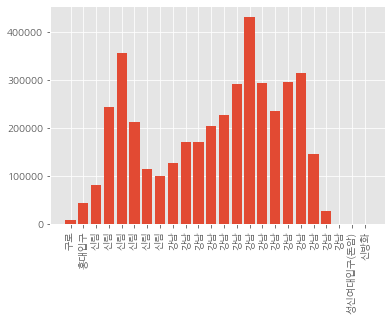

In [30]:
import matplotlib.pyplot as plt
plt.rc('font', family ='NanumGothic')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation =90)
plt.show()


x축에 시간이 표시되어 있지 않아서 알아보기 어렵다.

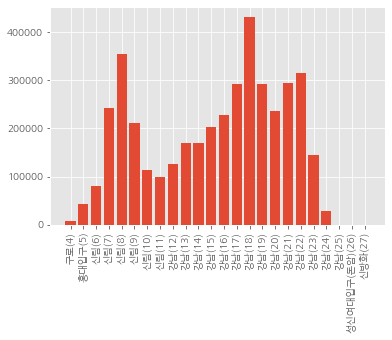

In [31]:
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24
mx_station = [''] * 24

for row in data :
    row[4:] = map(int, row[4:])
    for j in range(24) :
        a = row[j * 2 + 4]
        if a > mx[j] :
            mx[j] = a
            mx_station[j] = row[3]+'('+str(j+4)+')'
            
plt.rc('font', family ='NanumGothic')
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation =90)
plt.show()

이어서 시간대별 하차 인원이 가장 많은 역과 그 인원수를 막대그래프로 표현해보겠다.

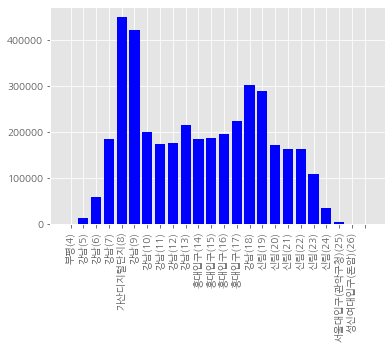

In [34]:
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)
next(data)
next(data)

mx = [0] * 24 # 시간대별 최대 하차 인원을 저장할 리스트 초기화
mx_station = [''] * 24 # 시간대별 최대 하차 인원 역 이름을 저장할 리스트 초기화

for row in data :
    row[4:] = map(int, row[4:])
    for j in range(24) :
        b = row[5 + j * 2] # j값과 인덱스 번호 값의 관계식 사용
        if b > mx[j] :
            mx[j] = b
            mx_station[j] = row[3]+'('+str(j+4)+')'

plt.rc('font',family = 'NanumGothic')
plt.bar(range(24), mx, color = 'b') # 막대그래프 속성 변경
plt.xticks(range(24), mx_station, rotation = 90)
plt.show()

## 5. 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면
---
__만약 모든 지하철역의 시간대별 승하차 인원을 더하면 어떤 결과를 확인할 수 있을까?__

이 질문을 해결하기 위한 알고리즘은 다음과 같이 간단히 생각할 수 있다.

1. 데이터를 읽어온다.
2. 모든 역에 대해 시간대별 승차 인원과 하차 인원을 누적해서 더한다.
3. 시간대별 승차 인원과 하차 인원을 그래프로 표현한다.

[105055, 3004777, 6109712, 16485348, 19843950, 12357620, 9438699, 9673116, 10609249, 11262850, 11106713, 12041962, 13343105, 16889514, 23883151, 13366319, 10190610, 9754728, 8167505, 3701401, 512101, 506, 22, 1]
[1616, 769865, 4063753, 9027520, 23309313, 15352447, 9873017, 9611044, 10183646, 11171310, 10979461, 11400318, 12321795, 14629199, 21088185, 18874835, 11095402, 9759638, 9230667, 6107653, 1981268, 66402, 21, 0]


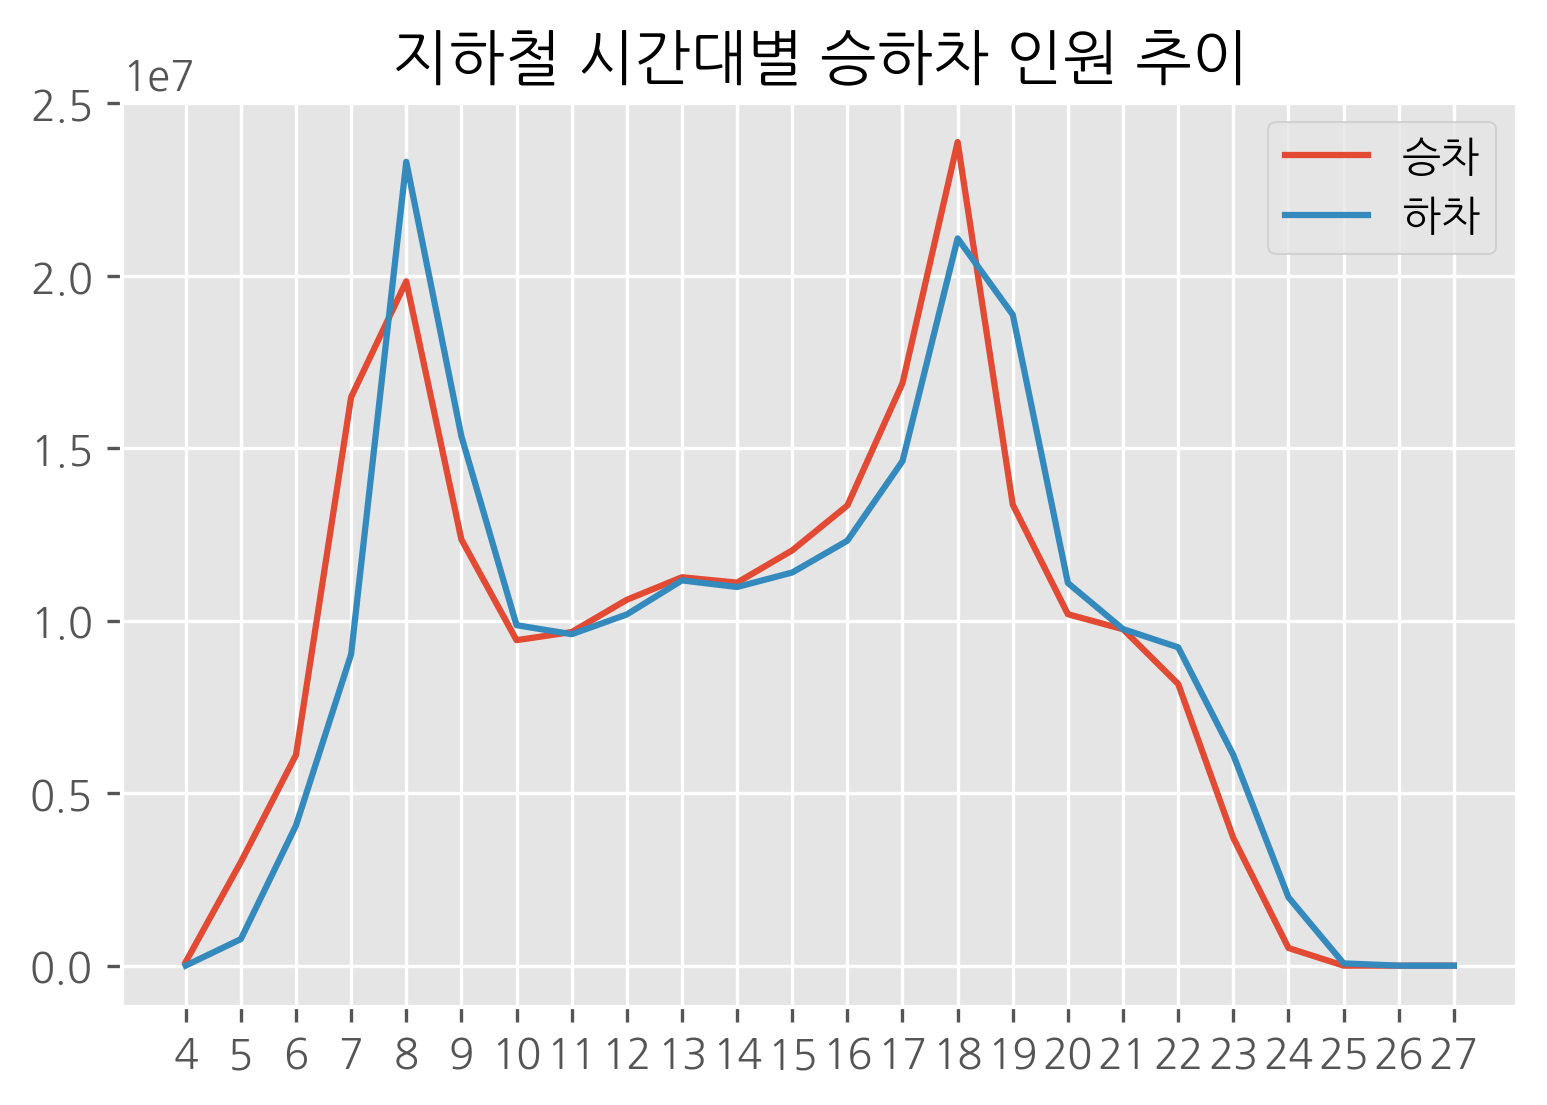

In [37]:
f = open('subwaytime.csv', encoding='cp949')

data = csv.reader(f)

next(data)
next(data)

s_in = [0] * 24 # 승차 인원 저장 리스트 초기화
s_out = [0] * 24 # 하차 인원 저장 리스트 초기화

for row in data :
    row[4:] = map(int, row[4:])
    for i in range(24) :
        s_in[i] += row[4 + i * 2]
        s_out[i] += row[5 + i * 2]

print(s_in)
print(s_out)
        
plt.figure(dpi = 300)
plt.rc('font', family = 'NanumGothic') 
plt.title('지하철 시간대별 승하차 인원 추이') # 제목 추가
plt.plot(s_in, label = '승차') # 승차 인원을 꺾은선 그래프로 표현
plt.plot(s_out, label = '하차') # 하차 인원을 꺾은선 그래프로 표현
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()